In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [64]:
#merging all datasets from 2008-2022 into one dataset
mergestorm_df = pd.concat( 
    map(pd.read_csv, ["resources/stormevents_2022.csv", 
                      "resources/stormevents_2021.csv",
                      "resources/stormevents_2020.csv",
                      "resources/stormevents_2019.csv",
                      "resources/stormevents_2018.csv", 
                      "resources/stormevents_2017.csv", 
                      "resources/stormevents_2016.csv", 
                      "resources/stormevents_2015.csv", 
                      "resources/stormevents_2014.csv", 
                      "resources/stormevents_2013.csv", 
                      "resources/stormevents_2012.csv", 
                      "resources/stormevents_2011.csv", 
                      "resources/stormevents_2010.csv", 
                      "resources/stormevents_2009.csv", 
                      "resources/stormevents_2008.csv"]),
    ignore_index=True) 
mergestorm_df.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,202202,20,2118,202202,20,2218,165464,999902,NEVADA,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strong winds increased ahead of an approaching...,"Station (UP994) 3.1 SE West Wendover, Elevatio...",CSV
1,202202,21,800,202202,22,1000,165465,999903,NEVADA,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A low centered over northern and central Nevad...,Thirteen inches fell at station (BCSN2) Big Cr...,CSV
2,202202,22,200,202202,22,900,165465,999904,NEVADA,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A low centered over northern and central Nevad...,Fifteen inches fell at station (TJMN2) Toe Jam...,CSV
3,202202,18,1609,202202,18,1609,165611,1001181,ATLANTIC SOUTH,87,...,7.0,SE,PONTE VEDRA,30.050,-81.1700,30.0500,-81.1700,Pre-frontal showers and thunderstorms moved so...,A brief waterspout was observed offshore of So...,CSV
4,202202,2,0,202202,3,0,165668,1001527,AMERICAN SAMOA,97,...,5.0,NNW,VAITOGI,-14.333,-170.7157,-14.3393,-170.7268,A surface trough over the Islands held the po...,"Over a 24-hour period, WSO Pago Pago recorded ...",CSV


In [65]:
# Create a DataFrame with selected columns 
clean_mergestorm_df = mergestorm_df[["YEAR", "STATE", "EVENT_TYPE",  
                              "INJURIES_DIRECT", "INJURIES_INDIRECT",
                              "DEATHS_DIRECT", "DEATHS_INDIRECT",
                                "DAMAGE_PROPERTY","DAMAGE_CROPS", 
                                "SOURCE", "MAGNITUDE", "MAGNITUDE_TYPE", 
                                "TOR_F_SCALE", "TOR_LENGTH", "TOR_WIDTH", 
                                "TOR_OTHER_CZ_STATE", "BEGIN_LOCATION", 
                                 "BEGIN_LAT", "BEGIN_LON", "END_LAT", 
                                "END_LON", "EPISODE_ID", "EVENT_ID",]]
clean_mergestorm_df.head()

,YEAR,STATE,EVENT_TYPE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,...,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_ID,EVENT_ID
0,2022,NEVADA,High Wind,0,0,0,0,0.00K,0.00K,Mesonet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165464,999902
1,2022,NEVADA,Heavy Snow,0,0,0,0,0.00K,0.00K,SNOTEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165465,999903
2,2022,NEVADA,Heavy Snow,0,0,0,0,0.00K,0.00K,SNOTEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165465,999904
3,2022,ATLANTIC SOUTH,Waterspout,0,0,0,0,0.00K,0.00K,Trained Spotter,...,NaN,NaN,NaN,PONTE VEDRA,30.050,-81.1700,30.0500,-81.1700,165611,1001181
4,2022,AMERICAN SAMOA,Heavy Rain,0,0,0,0,50.00K,0.00K,Official NWS Observations,...,NaN,NaN,NaN,VAITOGI,-14.333,-170.7157,-14.3393,-170.7268,165668,1001527


In [66]:
#looking to see what the data types are
clean_mergestorm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948286 entries, 0 to 948285
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   YEAR                948286 non-null  int64  
 1   STATE               948286 non-null  object 
 2   EVENT_TYPE          948286 non-null  object 
 3   INJURIES_DIRECT     948286 non-null  int64  
 4   INJURIES_INDIRECT   948286 non-null  int64  
 5   DEATHS_DIRECT       948286 non-null  int64  
 6   DEATHS_INDIRECT     948286 non-null  int64  
 7   DAMAGE_PROPERTY     777435 non-null  object 
 8   DAMAGE_CROPS        775903 non-null  object 
 9   SOURCE              948286 non-null  object 
 10  MAGNITUDE           500839 non-null  float64
 11  MAGNITUDE_TYPE      340870 non-null  object 
 12  TOR_F_SCALE         21140 non-null   object 
 13  TOR_LENGTH          21140 non-null   float64
 14  TOR_WIDTH           21140 non-null   float64
 15  TOR_OTHER_CZ_STATE  2733 non-null 

In [67]:
# Change a string into a float; account for magnitude of
# the number as represented in the string
def retype_damage_value(value_str):
    if (value_str == float('nan')):
        return value_str
    magnitude = value_str[-1]
    num = float(value_str[0:-2])
    if magnitude == 'K':
        num = num * 1000
    elif magnitude == 'M':
        num = num * 1000000
    elif magnitude == 'B':
        num = num * 1000000000
    else:
        num = float(value_str)
    return num

In [68]:
#Making the NaN values 0 for damage property and crops
clean_mergestorm_df.loc[:,"DAMAGE_PROPERTY"]=clean_mergestorm_df["DAMAGE_PROPERTY"].fillna("0.00K")
clean_mergestorm_df.loc[:,"DAMAGE_CROPS"]=clean_mergestorm_df["DAMAGE_CROPS"].fillna("0.00K")

In [69]:
# Changing damage columns from object to float
clean_mergestorm_df['DAMAGE_CROPS'] = clean_mergestorm_df['DAMAGE_CROPS'].apply(retype_damage_value)
clean_mergestorm_df['DAMAGE_PROPERTY'] = clean_mergestorm_df['DAMAGE_PROPERTY'].apply(retype_damage_value)

In [38]:
#checking that the conversion from object to float worked - yes!
clean_mergestorm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948286 entries, 0 to 948285
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   YEAR                948286 non-null  int64  
 1   STATE               948286 non-null  object 
 2   EVENT_TYPE          948286 non-null  object 
 3   INJURIES_DIRECT     948286 non-null  int64  
 4   INJURIES_INDIRECT   948286 non-null  int64  
 5   DEATHS_DIRECT       948286 non-null  int64  
 6   DEATHS_INDIRECT     948286 non-null  int64  
 7   DAMAGE_PROPERTY     948286 non-null  float64
 8   DAMAGE_CROPS        948286 non-null  float64
 9   SOURCE              948286 non-null  object 
 10  MAGNITUDE           500839 non-null  float64
 11  MAGNITUDE_TYPE      340870 non-null  object 
 12  TOR_F_SCALE         21140 non-null   object 
 13  TOR_LENGTH          21140 non-null   float64
 14  TOR_WIDTH           21140 non-null   float64
 15  TOR_OTHER_CZ_STATE  2733 non-null 

In [40]:
# Add new columns that combine direct and indirect deaths; direct and indirect injuries; and property damage and crop damage
clean_mergestorm_df["TOTAL DEATHS"] = clean_mergestorm_df["DEATHS_DIRECT"] + clean_mergestorm_df["DEATHS_INDIRECT"]
clean_mergestorm_df["TOTAL INJURIES"] = clean_mergestorm_df["INJURIES_DIRECT"] + clean_mergestorm_df["INJURIES_INDIRECT"]
clean_mergestorm_df["TOTAL DAMAGES"] = clean_mergestorm_df["DAMAGE_PROPERTY"] + clean_mergestorm_df["DAMAGE_CROPS"]

clean_mergestorm_df.head()

,YEAR,STATE,EVENT_TYPE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,...,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_ID,EVENT_ID,TOTAL DEATHS,TOTAL INJURIES,TOTAL DAMAGES
0,2022,NEVADA,High Wind,0,0,0,0,0.0,0.0,Mesonet,...,NaN,NaN,NaN,NaN,NaN,165464,999902,0,0,0.0
1,2022,NEVADA,Heavy Snow,0,0,0,0,0.0,0.0,SNOTEL,...,NaN,NaN,NaN,NaN,NaN,165465,999903,0,0,0.0
2,2022,NEVADA,Heavy Snow,0,0,0,0,0.0,0.0,SNOTEL,...,NaN,NaN,NaN,NaN,NaN,165465,999904,0,0,0.0
3,2022,ATLANTIC SOUTH,Waterspout,0,0,0,0,0.0,0.0,Trained Spotter,...,PONTE VEDRA,30.050,-81.1700,30.0500,-81.1700,165611,1001181,0,0,0.0
4,2022,AMERICAN SAMOA,Heavy Rain,0,0,0,0,50000.0,0.0,Official NWS Observations,...,VAITOGI,-14.333,-170.7157,-14.3393,-170.7268,165668,1001527,0,0,50000.0


In [42]:
#dropping the columns that were combined
drop_merged_df = clean_mergestorm_df.drop(columns=["INJURIES_DIRECT", "INJURIES_INDIRECT",
                                                   "DEATHS_DIRECT", "DEATHS_INDIRECT","DAMAGE_PROPERTY", "DAMAGE_CROPS"])
drop_merged_df.head()

,YEAR,STATE,EVENT_TYPE,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_ID,EVENT_ID,TOTAL DEATHS,TOTAL INJURIES,TOTAL DAMAGES
0,2022,NEVADA,High Wind,Mesonet,36.0,MS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165464,999902,0,0,0.0
1,2022,NEVADA,Heavy Snow,SNOTEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165465,999903,0,0,0.0
2,2022,NEVADA,Heavy Snow,SNOTEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165465,999904,0,0,0.0
3,2022,ATLANTIC SOUTH,Waterspout,Trained Spotter,NaN,NaN,NaN,NaN,NaN,NaN,PONTE VEDRA,30.050,-81.1700,30.0500,-81.1700,165611,1001181,0,0,0.0
4,2022,AMERICAN SAMOA,Heavy Rain,Official NWS Observations,NaN,NaN,NaN,NaN,NaN,NaN,VAITOGI,-14.333,-170.7157,-14.3393,-170.7268,165668,1001527,0,0,50000.0


In [44]:
# Narrow down events that have had at least one death and/or at least one injury 
narrow_df = drop_merged_df.loc[(drop_merged_df["TOTAL DEATHS"] > 0)|
(drop_merged_df["TOTAL INJURIES"] > 0)]

# Display sample data
narrow_df.head()

,YEAR,STATE,EVENT_TYPE,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_ID,EVENT_ID,TOTAL DEATHS,TOTAL INJURIES,TOTAL DAMAGES
12,2022,FLORIDA,Dense Fog,Emergency Manager,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165593,1001094,0,30,0.0
80,2022,MISSOURI,Winter Storm,Public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175269,1078711,0,3,0.0
461,2022,FLORIDA,Rip Current,County Official,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168741,1021872,1,0,0.0
472,2022,FLORIDA,Rip Current,Lifeguard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169739,1027877,0,1,0.0
683,2022,TEXAS,Tornado,NWS Storm Survey,NaN,NaN,EF1,5.19,440.0,NaN,FRUITLAND,33.5182,-97.8369,33.5815,-97.7953,167427,1013708,0,3,0.0


In [14]:
# Export the narrowed data into a csv
narrow_df.to_csv("narrow_df.csv")



In [45]:
# Read saved data
pd.read_csv("narrow_df.csv")

narrow_df.head()

,YEAR,STATE,EVENT_TYPE,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_ID,EVENT_ID,TOTAL DEATHS,TOTAL INJURIES,TOTAL DAMAGES
12,2022,FLORIDA,Dense Fog,Emergency Manager,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165593,1001094,0,30,0.0
80,2022,MISSOURI,Winter Storm,Public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175269,1078711,0,3,0.0
461,2022,FLORIDA,Rip Current,County Official,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168741,1021872,1,0,0.0
472,2022,FLORIDA,Rip Current,Lifeguard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169739,1027877,0,1,0.0
683,2022,TEXAS,Tornado,NWS Storm Survey,NaN,NaN,EF1,5.19,440.0,NaN,FRUITLAND,33.5182,-97.8369,33.5815,-97.7953,167427,1013708,0,3,0.0


In [46]:
#reordering the placement of the columns
reordernarrow_df= narrow_df[["YEAR", "STATE", "EVENT_TYPE",  
                              "TOTAL DEATHS", "TOTAL INJURIES",
                              "TOTAL DAMAGES", 
                              "SOURCE", "MAGNITUDE", "MAGNITUDE_TYPE", 
                              "TOR_F_SCALE", "TOR_LENGTH", "TOR_WIDTH",
                              "TOR_OTHER_CZ_STATE", "BEGIN_LOCATION", 
                              "BEGIN_LAT", "BEGIN_LON", "END_LAT", "END_LON", 
                              "EPISODE_ID", "EVENT_ID",]]
# reset the index 
reordernarrow_df.reset_index(drop=True, inplace=True)

reordernarrow_df.head()

,YEAR,STATE,EVENT_TYPE,TOTAL DEATHS,TOTAL INJURIES,TOTAL DAMAGES,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_ID,EVENT_ID
0,2022,FLORIDA,Dense Fog,0,30,0.0,Emergency Manager,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165593,1001094
1,2022,MISSOURI,Winter Storm,0,3,0.0,Public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175269,1078711
2,2022,FLORIDA,Rip Current,1,0,0.0,County Official,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168741,1021872
3,2022,FLORIDA,Rip Current,0,1,0.0,Lifeguard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169739,1027877
4,2022,TEXAS,Tornado,0,3,0.0,NWS Storm Survey,NaN,NaN,EF1,5.19,440.0,NaN,FRUITLAND,33.5182,-97.8369,33.5815,-97.7953,167427,1013708


In [47]:
#check total deaths, injuries, damages
print(reordernarrow_df[["TOTAL DEATHS"]].sum())

TOTAL DEATHS    12198
dtype: int64


In [51]:
#Grouping the dataset by deaths and year
groupbydeath_df=reordernarrow_df.sort_values(["TOTAL DEATHS"], 
                                     ascending=False).groupby("TOTAL DEATHS").head()

In [52]:
# Calling out the top 5 deadliest storms over 2008-2022
top_5 = groupbydeath_df.head()

top_5

,YEAR,STATE,EVENT_TYPE,TOTAL DEATHS,TOTAL INJURIES,TOTAL DAMAGES,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_ID,EVENT_ID
9652,2011,MISSOURI,Tornado,161,1150,2.800000e+09,NWS Storm Survey,NaN,NaN,EF5,8.8,1600.0,MO,CENTRAL CITY,37.056,-94.5701,37.0544,-94.4105,49972,296617
1098,2021,OREGON,Excessive Heat,93,0,1.000000e+05,ASOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158241,961302
3640,2018,CALIFORNIA,Wildfire,86,12,1.700000e+10,Fire Department/Rescue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131864,788675
454,2022,FLORIDA,Hurricane,60,0,7.000000e+09,Official NWS Observations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174632,1058654
31,2022,TEXAS,Heat,53,0,0.000000e+00,Broadcast Media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,171258,1039790


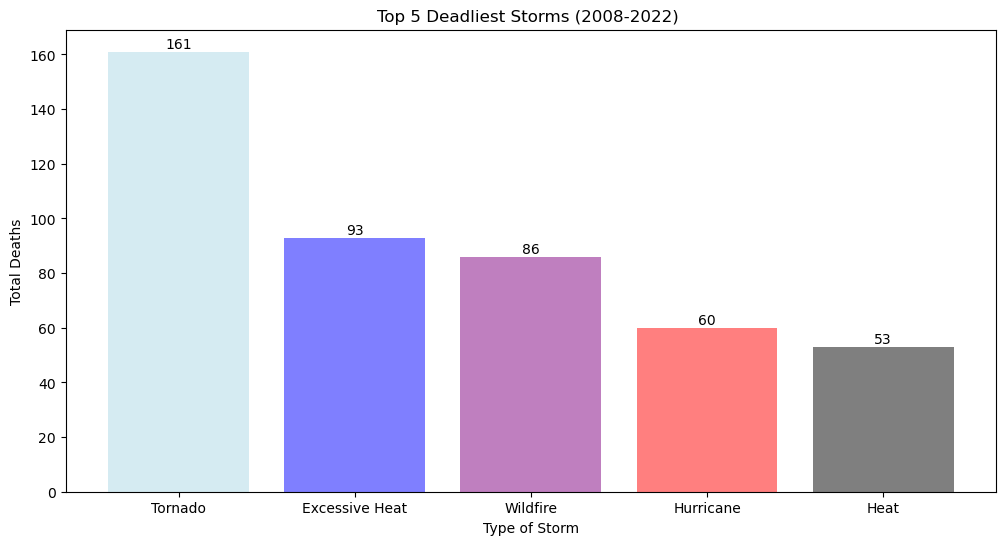

In [53]:
# Create a bar graph for top 5 deadliest storms (by type) from 2008-2022
# set the color and the figure size
color = ['lightblue', 'blue', 'purple', 'red', 'black']
plt.figure(figsize=(12, 6))

# Plot the bar chart
bars = plt.bar(top_5['EVENT_TYPE'], top_5['TOTAL DEATHS'], color=color, alpha=0.5)

# Add data labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

# set the title and labels
plt.title('Top 5 Deadliest Storms (2008-2022) ')
plt.xlabel('Type of Storm')
plt.ylabel('Total Deaths')

# Save the figure
plt.savefig("Fig3.png")

# show the figure
plt.show()

The correlation between deaths and damages is 0.43


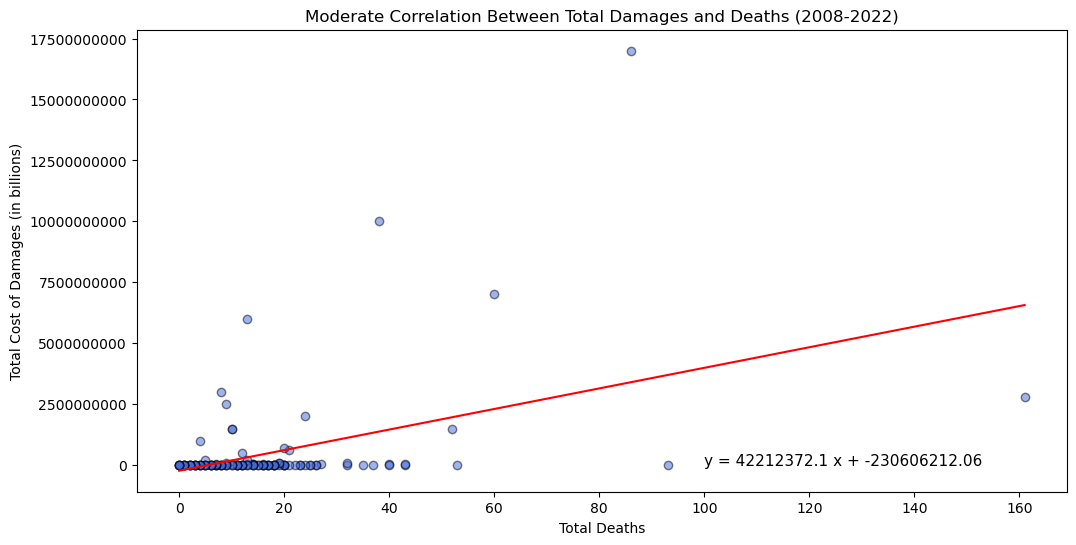

In [55]:
# Calculate the correlation coefficient and a linear regression model for deaths and damages

correlation =stats.pearsonr(groupbydeath_df["TOTAL DEATHS"],groupbydeath_df["TOTAL DAMAGES"])
print(f"The correlation between deaths and damages is {round(correlation[0],2)}")

# Add the linear regression equation and line to plot
(slope, intercept,rvalue, pvalue, stderr)= stats.linregress(groupbydeath_df["TOTAL DEATHS" ],groupbydeath_df["TOTAL DAMAGES"])
regress_values= groupbydeath_df["TOTAL DEATHS"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.figure(figsize=(12, 6))
plt.scatter(groupbydeath_df["TOTAL DEATHS"], groupbydeath_df["TOTAL DAMAGES"] ,color='royalblue', edgecolor='k', alpha=0.5)
plt.plot(groupbydeath_df["TOTAL DEATHS"], regress_values, color='red')
plt.ticklabel_format(style='plain')
plt.annotate(line_eq,(100, 36), fontsize=11)
plt.xlabel("Total Deaths") 
plt.ylabel("Total Cost of Damages (in billions)")
plt.title("Moderate Correlation Between Total Damages and Deaths (2008-2022)")

# Save the figure
plt.savefig("Fig1.png")

#show the figure
plt.show()


In [57]:
# Add new columns that combine deaths and injuries to look for correlation with damages
groupbydeath_df["TOTAL DEATHS & INJURIES"] = groupbydeath_df["TOTAL DEATHS"] + groupbydeath_df["TOTAL INJURIES"]

The correlation between total deaths and inuries combined and the cost of total damages is 0.13


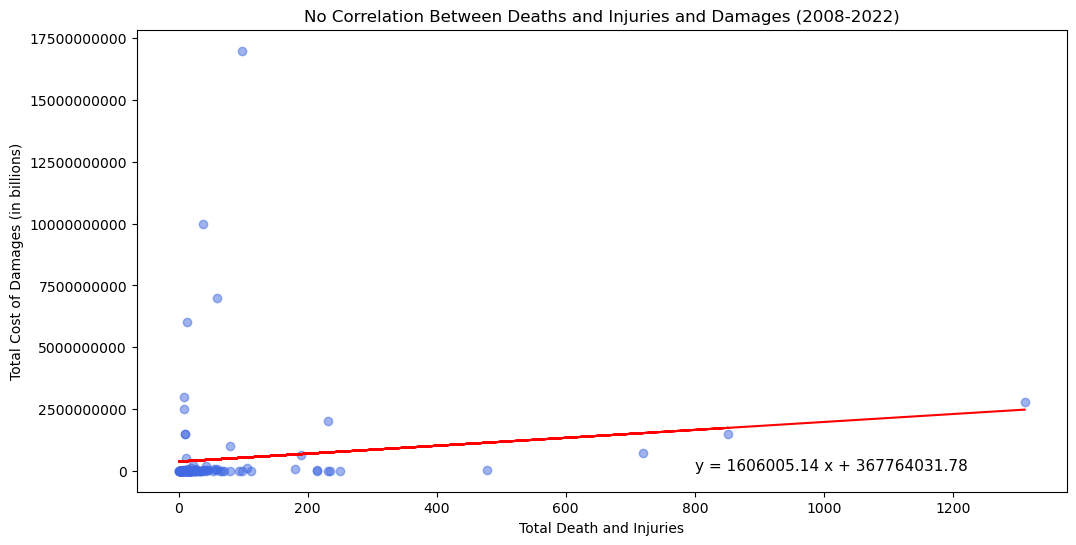

In [58]:
# Calculate the correlation coefficient and a linear regression model for total deaths/injuries and damages
correlation =stats.pearsonr(groupbydeath_df["TOTAL DEATHS & INJURIES"],groupbydeath_df["TOTAL DAMAGES"])
print(f"The correlation between total deaths and inuries combined and the cost of total damages is {round(correlation[0],2)}")

# Add the linear regression equation and line to plot
(slope, intercept,rvalue, pvalue, stderr)= stats.linregress(groupbydeath_df["TOTAL DEATHS & INJURIES" ],groupbydeath_df["TOTAL DAMAGES"])
regress_values= groupbydeath_df["TOTAL DEATHS & INJURIES"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

# Create the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(groupbydeath_df["TOTAL DEATHS & INJURIES"], groupbydeath_df["TOTAL DAMAGES"] ,color='royalblue', alpha=0.5)
plt.plot(groupbydeath_df["TOTAL DEATHS & INJURIES"], regress_values, color='red')
plt.ticklabel_format(style='plain')
plt.annotate(line_eq,(800, 36), fontsize=11)
plt.xlabel("Total Death and Injuries") 
plt.ylabel("Total Cost of Damages (in billions)")
plt.title("No Correlation Between Deaths and Injuries and Damages (2008-2022)")

# Save the figure
plt.savefig("Fig2.png")

# show the figure
plt.show()

In [59]:
#Making the NaN values 0 for total deaths and injuries to calculate summary statistics
groupbydeath_df.loc[:,"TOTAL DEATHS"]=groupbydeath_df["TOTAL DEATHS"].fillna("0")
groupbydeath_df.loc[:,"TOTAL INJURIES"]=groupbydeath_df["TOTAL INJURIES"].fillna("0")

In [60]:
# Generate a statistics summary table of mean, median, variance, standard deviation
# and SEM of the year and total death
death_mean = groupbydeath_df.groupby(["YEAR"])["TOTAL DEATHS"].mean()
death_median = groupbydeath_df.groupby(["YEAR"])["TOTAL DEATHS"].median()
death_var = groupbydeath_df.groupby(["YEAR"])["TOTAL DEATHS"].var()
death_std = groupbydeath_df.groupby(["YEAR"])["TOTAL DEATHS"].std()
death_sem = groupbydeath_df.groupby(["YEAR"])["TOTAL DEATHS"].sem()

# Assemble the resulting series into a single summary DataFrame.
death_summary_stats_df = pd.DataFrame({'Death Mean': death_mean,
                           'Death Median' : death_median,
                           'Death Variance': death_var,
                           'Death Std. Dev.' : death_std,
                           'Death Std. Err.' : death_sem})

death_summary_stats_df

,Death Mean,Death Median,Death Variance,Death Std. Dev.,Death Std. Err.
YEAR,,,,,
2008,10.166667,11.5,39.366667,6.274286,2.561467
2009,7.400000,1.0,189.300000,13.758634,6.153048
2010,8.500000,7.0,75.666667,8.698659,4.349329
2011,20.421053,12.0,1325.701754,36.410188,8.353070
2012,11.875000,9.0,68.696429,8.288331,2.930367
2013,21.250000,21.5,174.916667,13.225606,6.612803
2014,18.000000,8.0,475.000000,21.794495,12.583057
2015,8.250000,8.5,18.250000,4.272002,2.136001
2016,11.666667,12.5,97.466667,9.872521,4.030440


In [61]:
# Generate a summary statistics table of mean, median, variance, standard deviation
# and SEM of the year and total injuries
injury_mean = groupbydeath_df.groupby(["YEAR"])["TOTAL INJURIES"].mean()
injury_median = groupbydeath_df.groupby(["YEAR"])["TOTAL INJURIES"].median()
injury_var = groupbydeath_df.groupby(["YEAR"])["TOTAL INJURIES"].var()
injury_std = groupbydeath_df.groupby(["YEAR"])["TOTAL INJURIES"].std()
injury_sem = groupbydeath_df.groupby(["YEAR"])["TOTAL INJURIES"].sem()

# Assemble the resulting series into a single summary DataFrame.
injury_summary_stats_df = pd.DataFrame({'Injury Mean': injury_mean,
                           'Injury Median' : injury_median,
                           'Injury Variance': injury_var,
                           'Injury Std. Dev.' : injury_std,
                           'Injury Std. Err.' : injury_sem})
injury_summary_stats_df 

,Injury Mean,Injury Median,Injury Variance,Injury Std. Dev.,Injury Std. Err.
YEAR,,,,,
2008,51.000000,27.5,5790.400000,76.094678,31.065522
2009,30.800000,0.0,4299.200000,65.568285,29.323028
2010,8.250000,4.5,118.916667,10.904892,5.452446
2011,167.000000,25.0,110388.777778,332.248067,76.222934
2012,16.375000,0.0,867.982143,29.461537,10.416226
2013,105.000000,103.5,14706.000000,121.268298,60.634149
2014,7.000000,8.0,31.000000,5.567764,3.214550
2015,118.000000,2.0,54446.000000,233.336667,116.668333
2016,0.666667,0.0,1.466667,1.211060,0.494413


In [62]:
# Generate a summary statistics table of mean, median, variance, standard deviation
# and SEM of the year and total damages
damages_mean = groupbydeath_df.groupby(["YEAR"])["TOTAL DAMAGES"].mean()
damages_median = groupbydeath_df.groupby(["YEAR"])["TOTAL DAMAGES"].median()
damages_var = groupbydeath_df.groupby(["YEAR"])["TOTAL DAMAGES"].var()
damages_std = groupbydeath_df.groupby(["YEAR"])["TOTAL DAMAGES"].std()
damages_sem = groupbydeath_df.groupby(["YEAR"])["TOTAL DAMAGES"].sem()

# Assemble the resulting series into a single summary DataFrame.
damages_summary_stats_df = pd.DataFrame({'Damages Mean': damages_mean,
                           'Damages Median' : damages_median,
                           'Damages Variance': damages_var,
                           'Damages Std. Dev.' : damages_std,
                           'Damages Std. Err.' : damages_sem})
damages_summary_stats_df 

,Damages Mean,Damages Median,Damages Variance,Damages Std. Dev.,Damages Std. Err.
YEAR,,,,,
2008,2.106250e+07,8150000.0,8.857864e+14,2.976216e+07,1.215035e+07
2009,1.620400e+07,0.0,1.312848e+15,3.623325e+07,1.620400e+07
2010,3.776252e+08,5250000.0,5.598943e+17,7.482609e+08,3.741304e+08
2011,3.327237e+08,2200000.0,5.289517e+17,7.272907e+08,1.668519e+08
2012,9.375000e+04,0.0,7.031250e+10,2.651650e+05,9.375000e+04
2013,5.000000e+08,0.0,1.000000e+18,1.000000e+09,5.000000e+08
2014,2.040000e+07,1200000.0,1.176480e+15,3.429985e+07,1.980303e+07
2015,1.293750e+07,12875000.0,2.106823e+14,1.451490e+07,7.257449e+06
2016,6.671667e+06,0.0,2.665868e+14,1.632749e+07,6.665668e+06
